In [39]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns
pd.set_option("display.max_rows",None) #show all columns

In [40]:
df1=pd.read_csv('dataset/silage-corn-farm.csv')


In [41]:

df2=df1.copy()
#display(df2)
df2=df1[['Province','Province_number','Yield_avg_county','irrig_method_surf0_pressure1'
         ,'County','County_number','Ecwat','soil_texture_heavy0normallight1','ETo_mm'
         ,'irrig_water_m3ha','growth_days_GI','irrigation_count','yield_tonha']].copy()
display(df2)


,Province,Province_number,Yield_avg_county,irrig_method_surf0_pressure1,County,County_number,Ecwat,soil_texture_heavy0normallight1,ETo_mm,irrig_water_m3ha,growth_days_GI,irrigation_count,yield_tonha
0,Alborz,1,49.5,1,Karaj,1,0.4,1,594,6300,97,7,33.4
1,Alborz,1,49.5,1,Karaj,1,0.4,1,594,10670,97,10,45.0
2,Alborz,1,49.5,1,Karaj,1,0.4,0,537,8978,98,10,59.4
3,Alborz,1,49.5,1,Karaj,1,0.4,1,594,9070,97,8,60.0
4,Alborz,1,55.0,1,Hashtgerd,2,0.4,1,548,9257,96,8,50.0
5,Alborz,1,55.0,0,Hashtgerd,2,0.3,1,561,4478,98,21,60.0
6,Tehran,2,51.9,0,EslamShahr,3,0.6,1,700,6800,102,8,33.5
7,Tehran,2,51.9,0,EslamShahr,3,0.6,1,650,6920,96,10,41.0
8,Tehran,2,51.9,1,EslamShahr,3,0.9,0,732,6430,92,8,45.0
9,Tehran,2,51.9,1,EslamShahr,3,0.9,0,597,6930,91,9,48.0


In [42]:
x_county=df2['County_number']
x_province=df2['Province_number'].to_numpy()
x_ecwat = df2['Ecwat'].to_numpy()
x_soil = df2['soil_texture_heavy0normallight1'].to_numpy()
x_eto = df2['ETo_mm'].to_numpy()
x_wat = df2['irrig_water_m3ha'].to_numpy()
x_gd = df2['growth_days_GI'].to_numpy()
x_ie = df2['irrigation_count'].to_numpy()
ycounty=df2['Yield_avg_county'].to_numpy()
x_furrowpressure=df2['irrig_method_surf0_pressure1'].to_numpy()
y = df2['yield_tonha'].to_numpy()



#N=len(y)
x=np.c_[x_province,x_ecwat,x_soil,x_eto,x_wat,x_gd,x_ie,ycounty,x_furrowpressure]
province=df2['Province'].astype(str).values.tolist()
county=df2['County'].astype(str).values.tolist()

In [43]:
#province_unique= list(set(province))
#for i in range(8):
    #print(province_unique[i],province.count(province_unique[i]))

In [44]:
NProv=8
province_unique= [None] *NProv

for i in range(1,NProv+1):
    province_unique[i-1]=province[np.where(x_province==i)[0][0]]

for i in range(NProv):
    print(i+1,province_unique[i],np.count_nonzero(x_province==i+1))

1 Alborz 6
2 Tehran 19
3 Gazvin 10
4 Ardabil 6
5 Esfahan 9
6 Fars 12
7 KhorasanR 18
8 Khozestan 24


In [45]:
Ncounty=16
county_unique=[None]*Ncounty
for i in range(1,Ncounty+1):
    county_unique[i-1]=county[np.where(x_county==i)[0][0]]

for i in range(Ncounty):
    print(i+1,county_unique[i],np.count_nonzero(x_county==i+1))

1 Karaj 4
2 Hashtgerd 2
3 EslamShahr 9
4 Pakdasht 7
5 Shahrerey 3
6 Abyek 5
7 BoyeenZahra 5
8 Moghan 6
9 Shahinshar 9
10 Sepidan 6
11 Marvdasht 6
12 Chanaran 6
13 TorbatJam 6
14 Jovain 6
15 Behbahan 13
16 Dezful 11


60*a[0]*(x_wat/10000)**a[1]*(x_eto/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/100)**a[5]
[ 0.567  0.162  0.621  0.242 -0.087 -0.485  0.     0.     0.     0.   ]


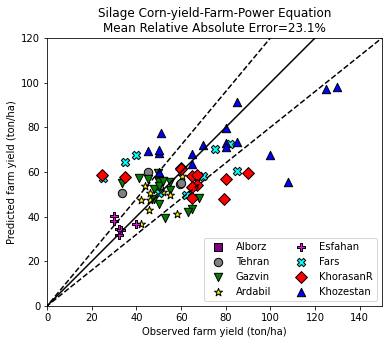

In [46]:



a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x):
    
    x_province=x[:,0]
    x_ecwat=x[:,1]
    x_soil=x[:,2]
    x_eto=x[:,3]
    x_wat=x[:,4]
    x_gd=x[:,5]
    x_ie=x[:,6]
    x_yavg=x[:,7]
    x_furrowpressure=x[:,8]
    
    return 60*a[0]*(x_wat/10000)**a[1]*(x_eto/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/100)**a[5]#*(x_furrowpressure+0.5)**a[6]




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print("60*a[0]*(x_wat/10000)**a[1]*(x_eto/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/100)**a[5]")
print(a[0:10])


#y1=32000*(-0.067+0.213*x_wat/11000+0.796*x_y1/20000)

yhat=func1(a,x)


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']
colors_=['purple','gray','green','yellow','magenta','cyan','red','blue']

for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], yhat[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=150)
ax.set_ylim(bottom=0,top=120)
ax.set_aspect('equal')
R2=np.round(r2_score(y,yhat),3)

err_percent=np.round(np.mean(np.abs(yhat-y)/y),3)*100

ax.set_title("Silage Corn-yield-Farm-Power Equation\nMean Relative Absolute Error="+str(err_percent)+"%")
fig.savefig('fig/silage_corn_farm_yield.png', dpi=300)




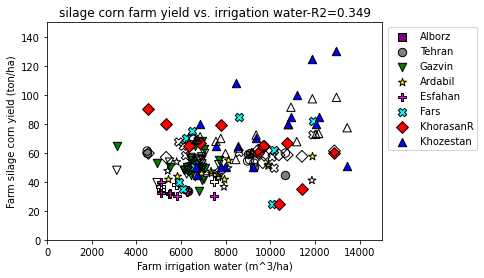

In [47]:
for i in range(NProv):
    cond=x_province==i
    plt.scatter(x_wat[cond], y[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])
    plt.scatter(x_wat[cond], yhat[cond],marker=markers_[i],s=70,facecolor='none',edgecolor='k')
    
    
plt.xlabel('Farm irrigation water (m^3/ha)')
plt.ylabel('Farm silage corn yield (ton/ha)')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1)
plt.xlim(left=0,right=15000)
plt.ylim(bottom=0,top=150)

plt.title("silage corn farm yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig/silage_corn_farm_yield_vs_irrigwat.png', dpi=300)

In [48]:
a

array([ 0.567,  0.162,  0.621,  0.242, -0.087, -0.485,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ])

In [49]:
np.round(np.mean(np.abs(ycounty-y)/y),3)*100

18.5

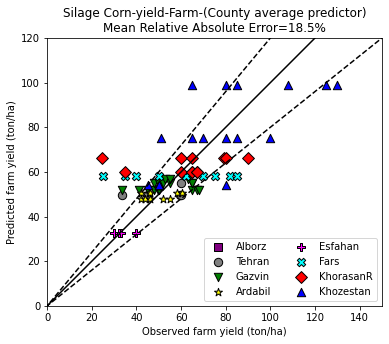

In [50]:

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']
colors_=['purple','gray','green','yellow','magenta','cyan','red','blue']

for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], ycounty[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=150)
ax.set_ylim(bottom=0,top=120)
ax.set_aspect('equal')
R2=np.round(r2_score(y,ycounty),3)

err_percent=np.round(np.mean(np.abs(ycounty-y)/y),3)*100

ax.set_title("Silage Corn-yield-Farm-(County average predictor)\nMean Relative Absolute Error="+str(err_percent)+"%")
fig.savefig('fig/silage_corn_farm_yield_county_avg.png', dpi=300)


